In [1]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
import html
import string
import os
from os import path
from PIL import Image

In [2]:
df=pd.read_csv('Desktop/kuc-hackathon-winter-2018/drugsComTrain_raw.csv',encoding='utf-8')

In [3]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [7]:
len(df.condition.unique()) 

885

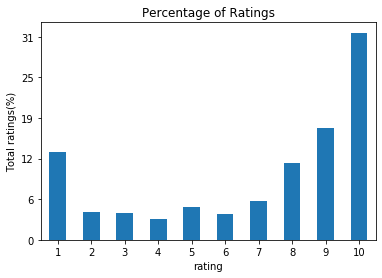

In [8]:
rate=df.groupby('rating').size()
ax=rate.plot(kind='bar',title='Percentage of Ratings')
plt.ylabel('Total ratings(%)')
ax.set_yticklabels([0,round(10000*100/sum(rate)),round(20000*100/sum(rate)),round(30000*100/sum(rate)),round(40000*100/sum(rate)),round(50000*100/sum(rate))])
#ax.set_yticklabels(norm)
_=plt.xticks(rotation=0)

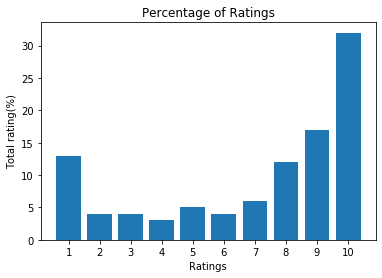

In [9]:
rating=df.groupby('rating').size()
x_pos=list(rating.index)
y_pos=[round(i*100/sum(rating)) for i in rating]
plt.bar(x_pos, y_pos)
plt.xticks(x_pos)
plt.ylabel("Total rating(%)")
plt.xlabel('Ratings')
plt.title('Percentage of Ratings')
plt.show()

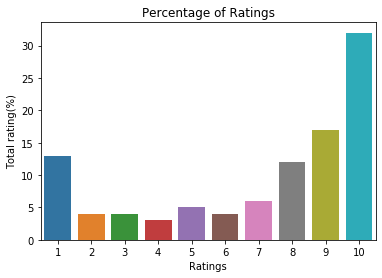

In [10]:
rating=df.groupby('rating').size()
x_pos=list(rating.index)
y_pos=[round(i*100/sum(rating)) for i in rating]
_=sns.barplot(x_pos,y_pos).set(title='Ratings Distribution on Drugs',xlabel='Ratings',ylabel="Total rating(%)")
_=plt.xticks(rotation=0)

In [11]:
df['review-length']=df['review'].apply(lambda x: len(x))

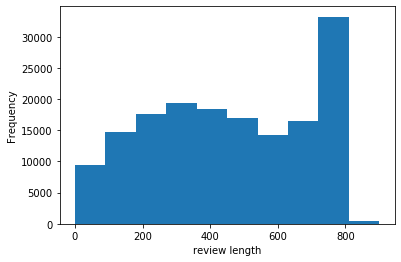

In [12]:
_=df['review-length'].plot(kind='hist',range=(0,900))
_=plt.xlabel('review length')

In [13]:
#the most common reviewed drugs
#df.drugName.value_counts().head()
df.groupby('drugName')['rating'].count().sort_values(ascending=False).head(5)#.plot(kind='bar')
#plt.xticks(rotation=45)

drugName
Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
Name: rating, dtype: int64

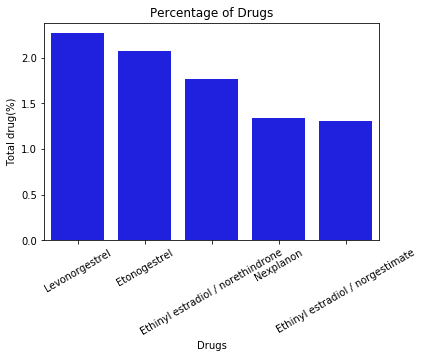

In [14]:
db=df.groupby('drugName')['rating'].count().sort_values(ascending=False).head(5)
dc=df.groupby('drugName')['rating'].count().sort_values(ascending=False)
ddxa=db.index
ddya=[round(i*100/sum(dc),2) for i in db]
_=sns.barplot(ddxa,ddya,color='blue').set(title='Percentage of Drugs',xlabel='Drugs',ylabel="Total drug(%)")
_=plt.xticks(rotation=30)

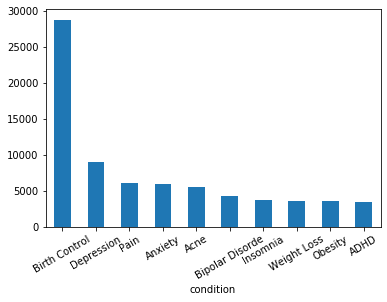

In [15]:
#the most common conditions
#df.condition.value_counts().head()
df.groupby('condition')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')
_=plt.xticks(rotation=30)

In [16]:
ddd=df.groupby('condition')['rating'].count().sort_values(ascending=False).head(10)
dda=df.groupby('condition')['rating'].count().sort_values(ascending=False)
ddx=ddd.index
ddy=[round(i*100/sum(dda),2) for i in ddd]

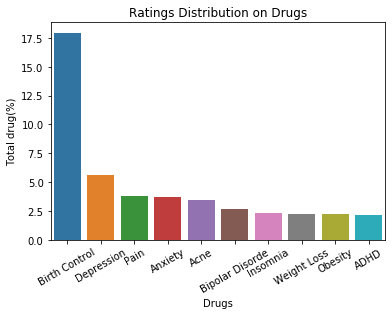

In [51]:
_=sns.barplot(ddx,ddy).set(title='Percentage of Drugs',xlabel='Drugs',ylabel="Total drug(%)")
_=plt.xticks(rotation=30)

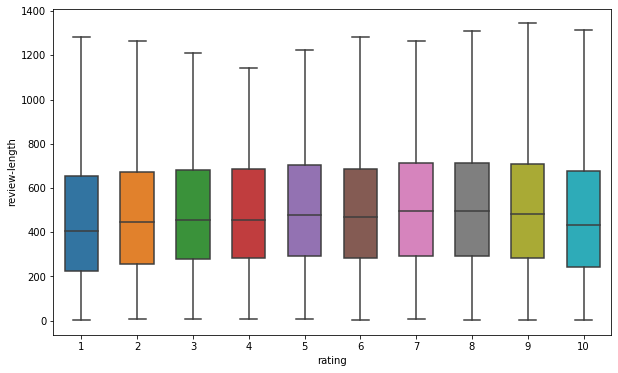

In [18]:
#Relationship between review-length and rating
plt.figure(figsize=(10,6))
sns.boxplot(df.rating,df['review-length'],width=0.6,showfliers = False)

In [19]:
#Drug names that people rates 10
df[df.rating==10].groupby('drugName')['rating'].count().sort_values(ascending=False).head(5)

drugName
Levonorgestrel                       1395
Phentermine                           813
Etonogestrel                          646
Varenicline                           479
Ethinyl estradiol / norethindrone     470
Name: rating, dtype: int64

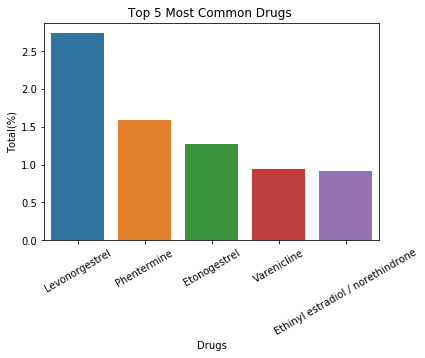

In [52]:
r10h=df[df.rating==10].groupby('drugName')['rating'].count().sort_values(ascending=False).head(5)
r10a=df[df.rating==10].groupby('drugName')['rating'].count().sort_values(ascending=False)
r10x=r10h.index
r10y=[round(i*100/sum(r10a),2) for i in r10h]
_=sns.barplot(r10x,r10y).set(title="Top 5 Most Common Drugs ",xlabel='Drugs',ylabel="Total(%)")
_=plt.xticks(rotation=30)

In [22]:
#Drug names that people rates 1
df[df.rating==1].groupby('drugName')['rating'].count().sort_values(ascending=False).head(10)

drugName
Ethinyl estradiol / norethindrone     582
Miconazole                            569
Etonogestrel                          530
Levonorgestrel                        383
Nexplanon                             371
Ethinyl estradiol / norgestimate      351
Medroxyprogesterone                   348
Depo-Provera                          326
Ethinyl estradiol / levonorgestrel    294
Tioconazole                           288
Name: rating, dtype: int64

In [23]:
df=df[(df.rating==1)|(df.rating==2)|(df.rating==9)|(df.rating==10)]

In [24]:
sp = spacy.load('en_core_web_sm')

In [25]:
def clean_text(text):
    text=html.unescape(text)
    text=sp(text)
    #Lemmatize the words
    text=[word.lemma_ for word in text]
    #Lower case 
    text=[word.lower() for word in text]
    #Remove punctuation
    text=[word for word in text if word not in string.punctuation and word!='-pron-']
    #Remove stop words
    stop = stopwords.words('english')
    text=[word for word in text if word not in stop]
    #join the word as a sentence
    text=" ".join(text)
    #split to remove white spaces 
    text=" ".join(text.split())
    return text

In [26]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review-length
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,79
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,719
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,403
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,142
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,733


In [27]:
df['clean_review']=df.review.apply(lambda x:clean_text(x))

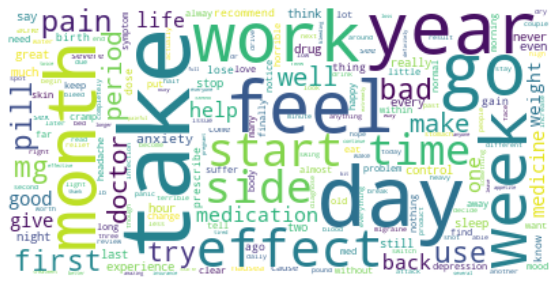

In [28]:
text=" ".join(review for review in df.clean_review)
wordcloud = WordCloud(background_color="white",collocations=False).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

```python
#lemmatization
df['review1'] = df['review1'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['review1'].head()
```

In [29]:
df['sensitive']=df.rating.apply(lambda x:'positive' if x>8 else 'negative')

In [30]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review-length,clean_review,sensitive
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,79,side effect take combination bystolic 5 mg fis...,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,719,suboxone completely turn life around feel heal...,positive
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,403,2nd day 5 mg start work rock hard erection how...,negative
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,142,pull cumme bit take plan b 26 hour later take ...,negative
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,733,abilify change life hope zoloft clonidine firs...,positive


In [125]:
df[df.drugName=='Levonorgestrel'].rating.mean()

7.990449661758854

In [126]:
df[df.drugName=='Phentermine'].rating.mean()

9.372681281618886

In [127]:
phen=df[df.drugName=='Phentermine'].rating
lev=df[df.drugName=='Levonorgestrel'].rating

In [128]:
from scipy import stats
stats.ttest_ind(lev,phen)

Ttest_indResult(statistic=-13.142976554271733, pvalue=1.3521719499487468e-38)

In [131]:
obe=df[df.condition=='Obesity'].rating
adh=df[df.condition=='Weight Loss'].rating

In [132]:

stats.ttest_ind(obe,adh)

Ttest_indResult(statistic=-3.921497669901991, pvalue=8.915809890891238e-05)

In [133]:
top10drugs=list(df.drugName.value_counts().head(10).index)

In [134]:
top10drugs

['Levonorgestrel',
 'Etonogestrel',
 'Ethinyl estradiol / norethindrone',
 'Nexplanon',
 'Phentermine',
 'Ethinyl estradiol / norgestimate',
 'Ethinyl estradiol / levonorgestrel',
 'Sertraline',
 'Escitalopram',
 'Mirena']

In [166]:
import itertools
from scipy import stats
combine=itertools.combinations(top10drugs, 2)

In [167]:
for com in combine:
    sonuc=stats.ttest_ind(df[df.drugName==com[0]].rating,df[df.drugName==com[1]].rating)
    if sonuc[1]>0.05:
        print(com[1],com[0],sonuc[1])

Sertraline Levonorgestrel 0.6750380970362211
Nexplanon Etonogestrel 0.16783903956144114
Ethinyl estradiol / norgestimate Etonogestrel 0.4363820507658227
Ethinyl estradiol / levonorgestrel Etonogestrel 0.8776731355669333
Ethinyl estradiol / norgestimate Nexplanon 0.5843705891683966
Ethinyl estradiol / levonorgestrel Nexplanon 0.284898182864414
Ethinyl estradiol / levonorgestrel Ethinyl estradiol / norgestimate 0.5866418260590868


In [178]:
df[df.drugName=='Sertraline'].rating.mean()

8.046457607433217

In [179]:
df[df.drugName=='Levonorgestrel'].rating.mean()

7.990449661758854

In [49]:
def mycloud(data,posorneg):
    
    #Label 1 the input and create column
    coly=(data.sensitive==posorneg)*1
    
    vectorizer = CountVectorizer(min_df=30)

    #Create term-document matrix with CountVectorizer 
    colx=vectorizer.fit_transform(data.clean_review)
    
    nb=MultinomialNB()
    X_train,X_test,y_train,y_test=train_test_split(colx,coly,test_size=0.20,random_state=0)
    #fit the model
    nb.fit(X_train, y_train)
    
    #gets feature names
    word = np.array(vectorizer.get_feature_names())
    
    x = np.eye(X_test.shape[1])
    prob = nb.predict_proba(x)[:, 1]
    ind = np.argsort(prob)[::-1]
    
    pos_word=word[ind[:100]]
    pos_prob = prob[ind[:100]] 
    
    #Create a mask
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    mask1= np.array(Image.open(path.join(d,"Desktop/up.jpg")))
    mask2=np.array(Image.open(path.join(d,"Desktop/down.jpg")))
    
    #Create a wordCloud
    res=dict(zip(pos_word,pos_prob))
    plt.figure(figsize=(13,6))
    wordcloud = WordCloud(background_color="white",relative_scaling=1,normalize_plurals=False,
                         mask=mask1 if posorneg=='positive' else mask2,
                          contour_width=2, contour_color='steelblue').generate_from_frequencies(res)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    return plt.show(),pos_word[:10],pos_prob[:10]

Levonorgestrel positive reviews


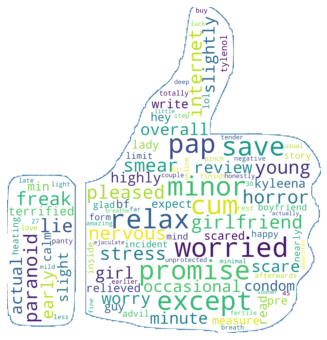

(None,
 array(['worried', 'minor', 'except', 'pap', 'cum', 'relax', 'promise',
        'save', 'girlfriend', 'lie'], dtype='<U13'),
 array([0.98946379, 0.98178896, 0.97560918, 0.97508067, 0.97271585,
        0.97271585, 0.97135674, 0.96985513, 0.96728231, 0.96632425]))

In [54]:
print('Levonorgestrel positive reviews')
mycloud(df[df.drugName=='Levonorgestrel'],'positive')

Levonorgestrel negative reviews


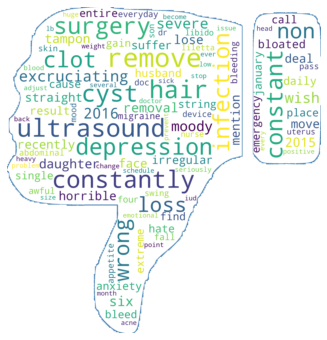

(None,
 array(['remove', 'ultrasound', 'hair', 'constantly', 'cyst', 'surgery',
        'depression', 'constant', 'infection', 'clot'], dtype='<U13'),
 array([0.7705412 , 0.72565638, 0.7212592 , 0.69697479, 0.68862792,
        0.67647586, 0.66667202, 0.66637937, 0.64946995, 0.64550035]))

In [55]:
print('Levonorgestrel negative reviews')
mycloud(df[df.drugName=='Levonorgestrel'],'negative')

Phentermine positive reviews


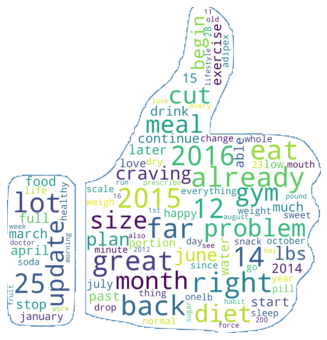

(None,
 array(['12', '14', 'great', 'far', 'eat', '2016', '25', 'lot', 'right',
        '2015'], dtype='<U12'),
 array([0.9874921 , 0.98658916, 0.98454354, 0.98387263, 0.98371555,
        0.98339204, 0.98314084, 0.98288192, 0.98288192, 0.98288192]))

In [89]:
print('Phentermine positive reviews')
mycloud(df[df.drugName=='Phentermine'],'positive')

Phentermine negative reviews


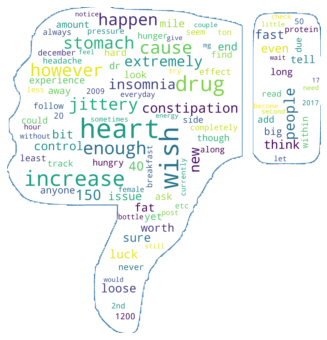

(None,
 array(['heart', 'wish', 'increase', 'drug', 'cause', 'enough', 'however',
        'stomach', 'jittery', 'happen'], dtype='<U12'),
 array([0.24357397, 0.23642058, 0.19280033, 0.19080015, 0.16237381,
        0.16237381, 0.16042631, 0.15666818, 0.15238449, 0.15134992]))

In [88]:
print('Phentermine negative reviews')
mycloud(df[df.drugName=='Phentermine'],'negative')

### Top 5 condition WordCloud

top5condition=list(df.condition.value_counts().head(5).index)

mycloud(df[df.condition.isin(top5condition)],'positive')

## Machine Learning

In [36]:
#Import necesseray packages
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

### CountVectorizer

In [37]:
x=df['clean_review']
y=(df.sensitive=='positive')*1

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

#### Logistic Regression 

In [61]:
steps=[('vector',CountVectorizer()),
      ('logreg',LogisticRegression())]
pipeline=Pipeline(steps)
params={"vector__min_df":[1,5,10],
        "vector__max_df":[0.95],
       "logreg__C":np.arange(1,30)}
logregcv=GridSearchCV(pipeline,params,cv=5,scoring='balanced_accuracy')
logregcv.fit(X_train,y_train)
logregcv.best_params_

{'logreg__C': 5, 'vector__max_df': 0.95, 'vector__min_df': 1}

In [104]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
y_prob=logregcv.best_estimator_.predict_proba(X_test)[:,1]
precision,recall,thresholds=precision_recall_curve(y_test,y_prob)

Text(0, 0.5, 'Scores')

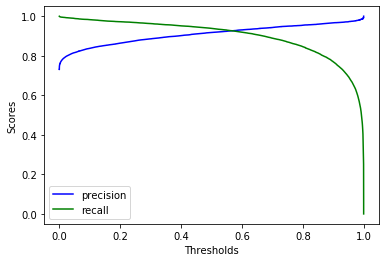

In [108]:
plt.plot(thresholds, precision[:-1], 'b-', label='precision')
plt.plot(thresholds, recall[:-1], 'g-', label = 'recall')
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("Scores")

In [62]:
print("                           CountVectorizer  ")

print('                Logistic Regression Classification Report')
print(" ")
print(classification_report(logregcv.best_estimator_.predict(X_test), y_test))

                           CountVectorizer  
                Logistic Regression Classification Report
 
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      5456
           1       0.94      0.92      0.93     15958

    accuracy                           0.89     21414
   macro avg       0.86      0.87      0.86     21414
weighted avg       0.90      0.89      0.90     21414



In [63]:
balanced_accuracy_score(y_test, logregcv.best_estimator_.predict(X_test))

0.8565888184015636

In [124]:
y_test.value_counts()

1    15612
0     5802
Name: sensitive, dtype: int64

#### Naive Bayes

In [65]:
steps=[('vector',CountVectorizer()),
      ('nb',MultinomialNB())]
pipeline=Pipeline(steps)
params={"vector__min_df":[1,5,10],
        "vector__max_df":[0.80,0.85,0.90,0.95]
       }
nbcv=GridSearchCV(pipeline,params,cv=5,scoring='balanced_accuracy')
nbcv.fit(X_train,y_train)
nbcv.best_params_

{'vector__max_df': 0.8, 'vector__min_df': 5}

In [66]:
print("                           CountVectorizer  ")

print('                Naive Bayes Classification Report')
print(" ")
print(classification_report(nbcv.best_estimator_.predict(X_test), y_test))

                           CountVectorizer  
                Naive Bayes Classification Report
 
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      5962
           1       0.89      0.90      0.89     15452

    accuracy                           0.84     21414
   macro avg       0.81      0.80      0.80     21414
weighted avg       0.84      0.84      0.84     21414



In [67]:
balanced_accuracy_score(y_test, nbcv.best_estimator_.predict(X_test))

0.8059860219421277

#### Random Forest

In [69]:
steps=[('vector',CountVectorizer()),
      ('rf',RandomForestClassifier())]
pipeline=Pipeline(steps)
params={"vector__min_df":[1,5,10],
        "vector__max_df":[0.95],
       "rf__n_estimators":(0.1,10,100),
       "rf__max_depth":(0.1,10,100),
       "rf__max_features":(0.1,10,100)}
cv=GridSearchCV(pipeline,params,cv=5,scoring='balanced_accuracy')
cv.fit(X_train,y_train)
cv.best_params_

{'rf__max_depth': 100,
 'rf__max_features': 0.1,
 'rf__n_estimators': 100,
 'vector__max_df': 0.95,
 'vector__min_df': 10}

In [70]:
print("                         CountVectorizer  ")

print('                Random Forest Classification Report')
print(" ")
print(classification_report(cv.best_estimator_.predict(X_test), y_test))

                         CountVectorizer  
                Random Forest Classification Report
 
              precision    recall  f1-score   support

           0       0.70      0.91      0.80      4482
           1       0.97      0.90      0.94     16932

    accuracy                           0.90     21414
   macro avg       0.84      0.91      0.87     21414
weighted avg       0.92      0.90      0.91     21414



In [71]:
balanced_accuracy_score(y_test, cv.best_estimator_.predict(X_test))

0.8399102220575958

### TFIDF

#### Logistic Regression 

In [73]:
steps=[('tfidf',TfidfVectorizer()),
      ('logreg',LogisticRegression())]
pipeline=Pipeline(steps)
params={"tfidf__min_df":[1,5,10],
        "tfidf__max_df":[0.95],
       "logreg__C":[0.01,0.1,1,10,50]}
logregtf=GridSearchCV(pipeline,params,cv=5,scoring='balanced_accuracy')
logregtf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [74]:
logregtf.best_params_

{'logreg__C': 50, 'tfidf__max_df': 0.95, 'tfidf__min_df': 1}

In [75]:
print("                           TfidfVectorizer  ")

print('                Logistic Regression Classification Report')
print(" ")
print(classification_report(logregtf.best_estimator_.predict(X_test), y_test))

                           TfidfVectorizer  
                Logistic Regression Classification Report
 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      5403
           1       0.94      0.92      0.93     16011

    accuracy                           0.89     21414
   macro avg       0.86      0.87      0.86     21414
weighted avg       0.90      0.89      0.90     21414



In [76]:
balanced_accuracy_score(y_test, logregtf.best_estimator_.predict(X_test))

0.8561585617724122

In [77]:
roc_auc_score(y_test, logregtf.best_estimator_.predict(X_test))

0.8561585617724123

#### Naive Bayes

In [78]:
steps=[('tfidf',TfidfVectorizer()),
      ('nb',MultinomialNB())]
pipeline=Pipeline(steps)
params={"tfidf__min_df":[1,5,10],
        "tfidf__max_df":[0.80,0.85,0.90,0.95]
       }
nbtf=GridSearchCV(pipeline,params,cv=5,scoring='balanced_accuracy')
nbtf.fit(X_train,y_train)
nbtf.best_params_

{'tfidf__max_df': 0.8, 'tfidf__min_df': 10}

In [79]:
print("                           TfidfVectorizer  ")

print('                Naive Bayes Classification Report')
print(" ")
print(classification_report(nbtf.best_estimator_.predict(X_test), y_test))

                           TfidfVectorizer  
                Naive Bayes Classification Report
 
              precision    recall  f1-score   support

           0       0.38      0.90      0.54      2467
           1       0.98      0.81      0.89     18947

    accuracy                           0.82     21414
   macro avg       0.68      0.85      0.71     21414
weighted avg       0.91      0.82      0.85     21414



In [80]:
balanced_accuracy_score(y_test, nbtf.best_estimator_.predict(X_test))

0.6824571280119951

In [81]:
roc_auc_score(y_test, nbtf.best_estimator_.predict(X_test))

0.6824571280119951

#### Random Forest

In [82]:
steps=[('tfidf',TfidfVectorizer(max_df=0.85)),
      ('rf',RandomForestClassifier())]
pipeline=Pipeline(steps)
params={"tfidf__min_df":[5,10,20],
       "rf__n_estimators":(0.01,0.1,10,100),
       "rf__max_depth":(0.01,0.1,10,100),
       "rf__max_features":(0.01,0.1,10,100)}
rftf=GridSearchCV(pipeline,params,cv=5)
rftf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.85,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        

In [83]:
rftf.best_params_

{'rf__max_depth': 100,
 'rf__max_features': 100,
 'rf__n_estimators': 100,
 'tfidf__min_df': 20}

In [84]:
print("                           TfidfVectorizer  ")

print('                Random Forest Classification Report')
print(" ")
print(classification_report(rftf.best_estimator_.predict(X_test), y_test))

                           TfidfVectorizer  
                Random Forest Classification Report
 
              precision    recall  f1-score   support

           0       0.66      0.96      0.78      3960
           1       0.99      0.89      0.93     17454

    accuracy                           0.90     21414
   macro avg       0.82      0.92      0.86     21414
weighted avg       0.93      0.90      0.91     21414



In [85]:
balanced_accuracy_score(y_test, rftf.best_estimator_.predict(X_test))

0.8227036331663311

In [86]:
roc_auc_score(y_test, rftf.best_estimator_.predict(X_test))

0.8227036331663311